<a href="https://colab.research.google.com/github/Sakshi-1306/Deep-Learning-Practicals/blob/main/Planner_Data_Classification_with_one_hidden_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt # ploting data and visualization

from sklearn import datasets # inbuilt planar datasets
from sklearn.linear_model import LogisticRegressionCV # Logistic Regression Classifier

In [2]:
def load_extra_datasets():
    N = 200
    noisy_circles = datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = datasets.make_moons(n_samples=N, noise=.2)
    gaussian_quantiles = datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)

    return noisy_circles, noisy_moons, gaussian_quantiles

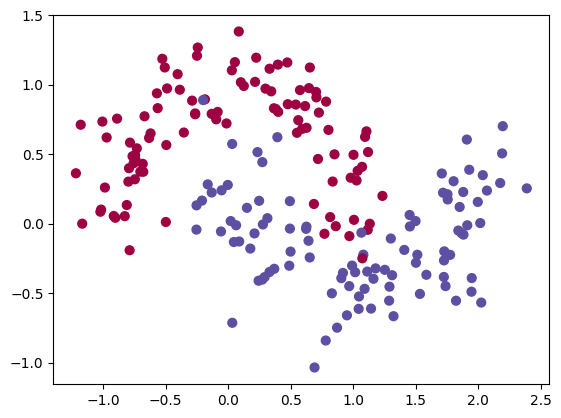

In [3]:
noisy_circles, noisy_moons, gaussian_quantiles = load_extra_datasets()

X, y = noisy_moons
X, y = X.T, y.reshape(1, y.shape[0])

plt.scatter(X[0, :], X[1, :], c=y, s=40, cmap=plt.cm.Spectral);

In [4]:
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (2, 200)
Shape of y: (1, 200)


In [5]:
# Train the logistic regression classifier
clf = LogisticRegressionCV()
clf.fit(X.T, y.T)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

In [6]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

accuracy of Logistic Regression model is: 86.0


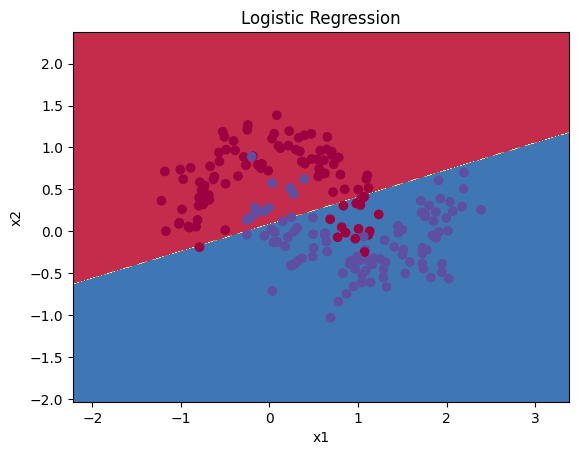

In [7]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print('accuracy of Logistic Regression model is:', sum(sum(LR_predictions == y))/y.shape[1]*100)

In [8]:
def layer_sizes(X, y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)

    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """

    n_x = X.shape[0] # number of input features
    n_h = 4 # number of nodes in the hidden layer
    n_y = y.shape[0] # number of output nodes

    return (n_x, n_h, n_y)

In [9]:
(n_x, n_h, n_y) = layer_sizes(X, y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 2
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 1


In [10]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.

    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))

    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [11]:
parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [12]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)

    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = 1/(1+np.exp(-Z2))

    assert(A2.shape == (1, X.shape[1]))

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

In [13]:
A2, cache = forward_propagation(X, parameters)

# Note: we use the mean here just to make sure that your output matches ours.
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

-0.005406918736078273 -0.005405083765579181 1.4965825833951328e-05 0.5000037414562875


In [14]:
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)

    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    [Note that the parameters argument is not used in this function,
    but the auto-grader currently expects this parameter.
    Future version of this notebook will fix both the notebook
    and the auto-grader so that `parameters` is not needed.
    For now, please include `parameters` in the function signature,
    and also when invoking this function.]

    Returns:
    cost -- cross-entropy cost given equation (13)

    """

    m = Y.shape[1] # number of example

    cost = (-1/m)*(np.dot(np.log(A2), Y.T) + np.dot(np.log(1-A2), Y.T))

    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect.
                                    # E.g., turns [[17]] into 17
    assert(isinstance(cost, float))

    return cost

In [15]:
print("cost = " + str(compute_cost(A2, y, parameters)))

cost = 0.6931472013046254


In [16]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.

    Arguments:
    parameters -- python dictionary containing our parameters
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]

    W1 = parameters['W1']
    W2 = parameters['W2']

    A1 = cache['A1']
    A2 = cache['A2']

    dZ2 = A2 - Y
    dW2 = (1/m)*(np.dot(dZ2, A1.T))
    db2 = (1/m)*(np.sum(dZ2, axis=1, keepdims=True))
    dZ1 = np.dot(W2.T, dZ2)*(1-np.power(A1, 2))
    dW1 = (1/m)*(np.dot(dZ1, X.T))
    db1 = (1/m)*(np.sum(dZ1, axis=1, keepdims=True))


    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}

    return grads

In [17]:
grads = backward_propagation(parameters, cache, X, y)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00265583 -0.0019184 ]
 [ 0.00227867 -0.00164751]
 [-0.00138332  0.00099983]
 [-0.00575379  0.00415593]]
db1 = [[-8.76435330e-08]
 [-1.15241337e-06]
 [ 4.08969262e-07]
 [ 6.05166329e-09]]
dW2 = [[ 0.00094421  0.00833406  0.00297488 -0.00352042]]
db2 = [[3.74145629e-06]]


In [18]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above

    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients

    Returns:
    parameters -- python dictionary containing your updated parameters
    """
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']

    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    W1 -= learning_rate*dW1
    b1 -= learning_rate*db1
    W2 -= learning_rate*dW2
    b2 -= learning_rate*db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

In [19]:
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00735457  0.00173941]
 [-0.02409636  0.01837972]
 [-0.01627437 -0.00961727]
 [ 0.01193336 -0.01744   ]]
b1 = [[ 1.05172240e-07]
 [ 1.38289604e-06]
 [-4.90763114e-07]
 [-7.26199595e-09]]
W2 = [[-0.01171257 -0.01909095  0.00194468  0.02714659]]
b2 = [[-4.48974754e-06]]


In [20]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)

        cost = compute_cost(A2, Y, parameters)

        grads = backward_propagation(parameters, cache, X, Y)

        parameters = update_parameters(parameters, grads)

    if print_cost and i % 1000 == 0:
        print("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [21]:
parameters = nn_model(X, y, 4, num_iterations=10000)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-2.43890187  1.92022327]
 [-6.95360841  6.26014317]
 [-5.25426445 -0.90412761]
 [-6.49662666 -2.48284086]]
b1 = [[ 2.91781204]
 [-3.0250833 ]
 [-1.66953729]
 [ 4.13383095]]
W2 = [[-8.71354343 -7.93913995 -4.15381512 11.40078715]]
b2 = [[-0.84679573]]


In [22]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X

    Arguments:
    parameters -- python dictionary containing your parameters
    X -- input data of size (n_x, m)

    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """

    A2, cache = forward_propagation(X, parameters)
    predictions = (A2>0.5)

    return predictions

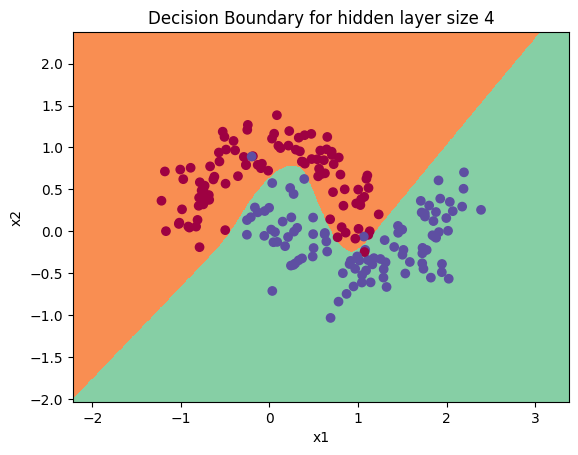

In [23]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, y, n_h = 5, num_iterations = 10000)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, y)
plt.title("Decision Boundary for hidden layer size " + str(4))
plt.show()

In [24]:
# Print accuracy
predictions = predict(parameters, X)
print('Accuracy: %.1f' %(sum(sum(y == predict(parameters, X)))/y.shape[1]*100) + '%')

Accuracy: 98.5%


Accuracy for 1 hidden units: 86.5 %
Accuracy for 2 hidden units: 87.5 %
Accuracy for 3 hidden units: 98.5 %
Accuracy for 4 hidden units: 98.5 %
Accuracy for 5 hidden units: 98.5 %
Accuracy for 20 hidden units: 86.5 %
Accuracy for 50 hidden units: 87.0 %


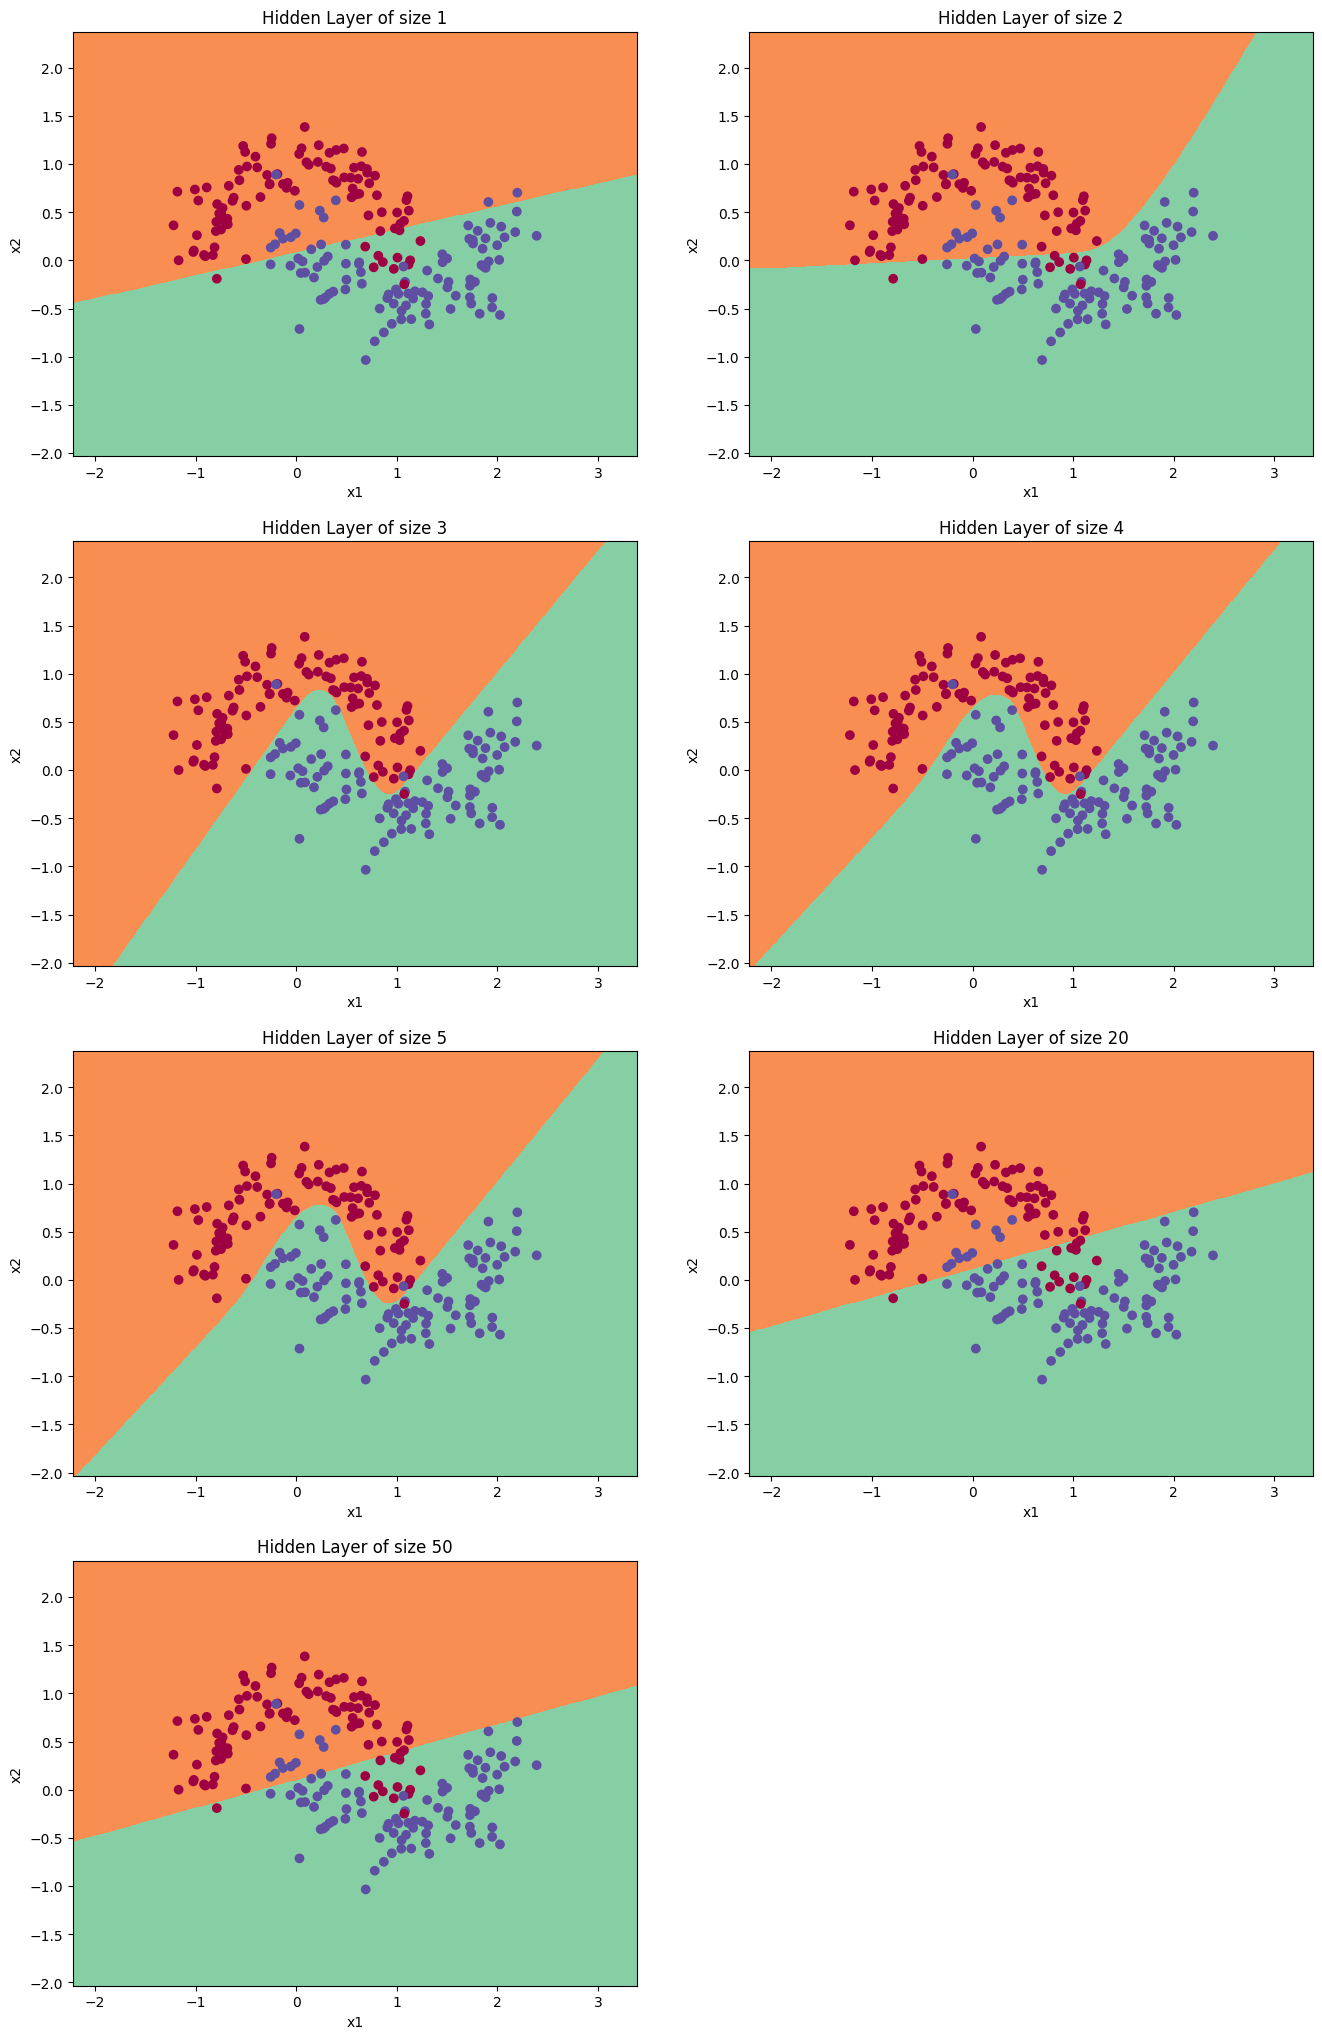

In [25]:
plt.figure(figsize=(16, 32))


hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]


for i, n_h in enumerate(hidden_layer_sizes):


    plt.subplot(5, 2, i+1)


    plt.title('Hidden Layer of size %d' % n_h)


    parameters = nn_model(X, y, n_h, num_iterations = 5000)


    plot_decision_boundary(lambda x: predict(parameters, x.T), X, y)
    predictions = predict(parameters, X)
    accuracy = sum(sum(y == predict(parameters, X)))/y.shape[1]*100
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))